In [25]:
import pandas as pd

In [26]:
df = pd.read_csv(r"housedata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [27]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [28]:
import numpy as np

In [29]:
house2 = df.copy()
for col in house2.columns:
    if house2[col].dtype == 'object':
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]])
X_train = house2.to_numpy()
print(X_train)

[[0.00000000e+00 3.13000000e+05 3.00000000e+00 ... 3.60000000e+01
  6.20000000e+01 0.00000000e+00]
 [0.00000000e+00 2.38400000e+06 5.00000000e+00 ... 3.50000000e+01
  5.80000000e+01 0.00000000e+00]
 [0.00000000e+00 3.42000000e+05 3.00000000e+00 ... 1.80000000e+01
  2.60000000e+01 0.00000000e+00]
 ...
 [6.80000000e+01 4.16904167e+05 3.00000000e+00 ... 3.20000000e+01
  3.70000000e+01 0.00000000e+00]
 [6.90000000e+01 2.03400000e+05 4.00000000e+00 ... 3.50000000e+01
  7.10000000e+01 0.00000000e+00]
 [6.90000000e+01 2.20600000e+05 3.00000000e+00 ... 9.00000000e+00
  2.60000000e+01 0.00000000e+00]]


In [30]:
import matplotlib.pyplot as plt

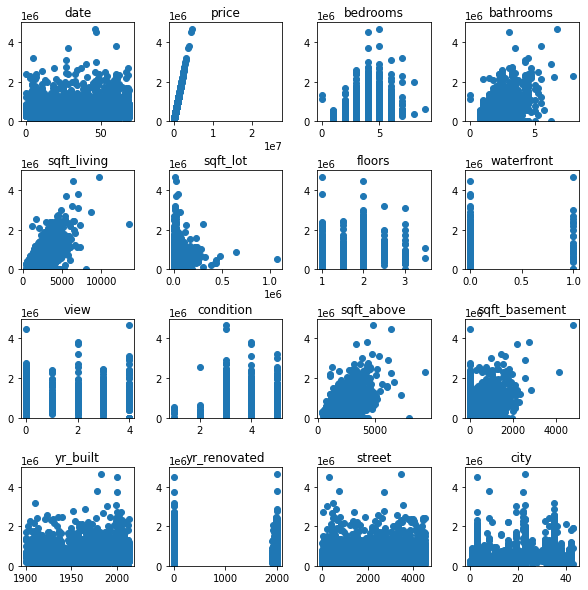

In [31]:
v = 0
fig, axs  = plt.subplots(4,4, figsize = (10,10))
for i in range (4):
    for j in range(4):
        axs[i,j].scatter(X_train[:,v],X_train[:,1])
        axs[i,j].set_title(df.columns[v])
        axs[i,j].set_ylim([0,0.5e7])
        v+=1
plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.show()

In [32]:
np.random.seed(0) # Poner la semilla para los metodos aleatorios y obtengamos el mismo reusltado siempre
X = StandardScaler().fit_transform(X_train)


In [33]:
from sklearn import cluster, metrics

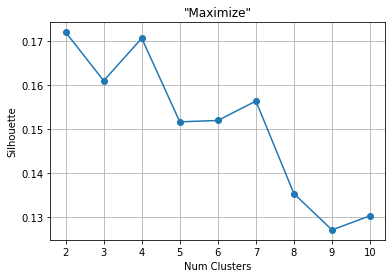

In [34]:
from sklearn.cluster import k_means
nc = 11
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()


In [35]:
k = 4  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X)


In [36]:
df['groups'] = y_pred1
houses = []
for g in range(k):
  houses.append(df[df['groups']==g])


In [37]:
for g in range(k):
    print('Group'+str(g),'has',len(houses[g]),'houses.')


Group0 has 1725 houses.
Group1 has 1682 houses.
Group2 has 1160 houses.
Group3 has 33 houses.


In [41]:
df_centroids = df.groupby("groups").mean().T
df_centroids

groups,0,1,2,3
price,448707.751910,725068.088888,428914.525365,1.451621e+06
bedrooms,2.998841,3.810345,3.406034,3.363636e+00
bathrooms,1.631449,2.799049,2.002586,2.863636e+00
sqft_living,1598.515362,2835.155172,1896.768966,3.471939e+03
sqft_lot,8027.416812,17970.423306,20273.912069,2.213000e+04
floors,1.229275,2.018133,1.194828,1.651515e+00
waterfront,0.000000,0.000000,0.000000,1.000000e+00
view,0.185507,0.310939,0.126724,3.545455e+00
condition,3.592464,3.168252,3.653448,3.454545e+00
sqft_above,1260.764058,2600.635553,1525.538793,2.627545e+03
